Exploring dataset from https://www.kaggle.com/datasets/crowdflower/political-social-media-posts?datasetId=406&language=Python. <br>
My task is to find biased, political tweets about Obamacare.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import html

In [120]:
data = pd.read_csv('C:/Users/igors/Desktop/Data Science/Jupyter Notebooks/datasets kaggle/political_social_media.csv', 
                   index_col='_unit_id')

In [121]:
data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
_unit_id,,,,,,,,,,,,,,,,,,,,
766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,1.0,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,1.0,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,1.0,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,1.0,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,1.0,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [122]:
# Data cleaning
cols_to_drop = ['_golden', '_unit_state','orig__golden', 'audience_gold', 'bias_gold','message_gold',
                '_trusted_judgments', ]
data.drop(columns=cols_to_drop, inplace = True)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 766192484 to 766197486
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _last_judgment_at    5000 non-null   object 
 1   audience             5000 non-null   object 
 2   audience:confidence  5000 non-null   float64
 3   bias                 5000 non-null   object 
 4   bias:confidence      5000 non-null   float64
 5   message              5000 non-null   object 
 6   message:confidence   5000 non-null   float64
 7   bioid                5000 non-null   object 
 8   embed                5000 non-null   object 
 9   id                   5000 non-null   object 
 10  label                5000 non-null   object 
 11  source               5000 non-null   object 
 12  text                 5000 non-null   object 
dtypes: float64(3), object(10)
memory usage: 546.9+ KB


In [124]:
data.head()

,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,message:confidence,bioid,embed,id,label,source,text
_unit_id,,,,,,,,,,,,,
766192484,8/4/15 21:17,national,1.0,partisan,1.0,policy,1.0,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
766192485,8/4/15 21:20,national,1.0,partisan,1.0,attack,1.0,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
766192486,8/4/15 21:14,national,1.0,neutral,1.0,support,1.0,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),twitter,Please join me today in remembering our fallen...
766192487,8/4/15 21:08,national,1.0,neutral,1.0,policy,1.0,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),twitter,RT @SenatorLeahy: 1st step toward Senate debat...
766192488,8/4/15 21:26,national,1.0,partisan,1.0,policy,1.0,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),twitter,.@amazon delivery #drones show need to update ...


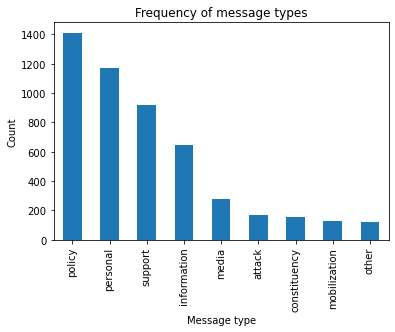

In [125]:
# Exploratory Data Analysis
data.groupby('message').count().sort_values('text', ascending=False)['text'].plot(kind='bar')
plt.xlabel('Message type')
plt.ylabel('Count')
plt.title('Frequency of message types')
plt.show()

In [126]:
policy = data.loc[data['message'] == 'policy']
policy.head()

,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,message:confidence,bioid,embed,id,label,source,text
_unit_id,,,,,,,,,,,,,
766192484,8/4/15 21:17,national,1.0,partisan,1.0,policy,1.0,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
766192487,8/4/15 21:08,national,1.0,neutral,1.0,policy,1.0,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),twitter,RT @SenatorLeahy: 1st step toward Senate debat...
766192488,8/4/15 21:26,national,1.0,partisan,1.0,policy,1.0,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),twitter,.@amazon delivery #drones show need to update ...
766192494,8/4/15 20:35,national,1.0,partisan,1.0,policy,1.0,F000456,"<blockquote class=""twitter-tweet"" width=""450"">...",4.68472E+17,From: John Fleming (Representative from Louisi...,twitter,"As POTUS golfs, pushes amnesty &amp; ignores K..."
766192496,8/4/15 21:18,national,1.0,neutral,1.0,policy,1.0,C000174,"<blockquote class=""twitter-tweet"" width=""450"">...",4.35829E+17,From: Thomas Carper (Senator from Delaware),twitter,FACT: The Recovery Act cut taxes for middle-cl...


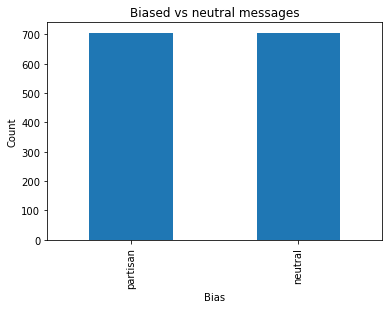

In [127]:
policy.groupby('bias').count().sort_values('bias', ascending=False)['text'].plot(kind='bar')
plt.xlabel('Bias')
plt.ylabel('Count')
plt.title('Biased vs neutral messages')
plt.show()

In [128]:
par_pol = policy.loc[policy['bias'] == 'partisan']
par_pol.head()

,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,message:confidence,bioid,embed,id,label,source,text
_unit_id,,,,,,,,,,,,,
766192484,8/4/15 21:17,national,1.0,partisan,1.0,policy,1.0,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
766192488,8/4/15 21:26,national,1.0,partisan,1.0,policy,1.0,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),twitter,.@amazon delivery #drones show need to update ...
766192494,8/4/15 20:35,national,1.0,partisan,1.0,policy,1.0,F000456,"<blockquote class=""twitter-tweet"" width=""450"">...",4.68472E+17,From: John Fleming (Representative from Louisi...,twitter,"As POTUS golfs, pushes amnesty &amp; ignores K..."
766192499,8/4/15 20:38,national,1.0,partisan,1.0,policy,1.0,G000555,"<blockquote class=""twitter-tweet"" width=""450"">...",4.30469E+17,From: Kirsten Gillibrand (Senator from New York),twitter,"At 5:45pm, Sen. @CoryBooker will give his maid..."
766192512,8/4/15 21:26,national,1.0,partisan,1.0,policy,1.0,C001070,"<blockquote class=""twitter-tweet"" width=""450"">...",3.5432E+17,From: Bob Casey (Senator from Pennsylvania),twitter,Slashing Amtrak�۪s funding by 1/3 at a time of...


In [131]:
# Printing biased tweets about Obamacare
for i, row in par_pol[par_pol['text'].apply(lambda txt: 'obamacare' in txt.lower())].iterrows(): 
    if row['source'] =='twitter': continue
    print(html.unescape(row.text))
    print()

Another effect of Obamacare- http://news.investors.com/politics-obamacare/101813-675710-100-school-districts-blame-obamacare-for-cuts-to-work-hours.htm

It seems HHS is holding a video contest (with thousand dollar cash prizes) for the best videos that encourage people to enroll in Obamacare. Your tax dollars at work.   I've decided to hold a video contest of my own. The prize? Freedom. Post a video on my facebook or twitter page (@MarshaBlackburn) highlighting the reasons to Delay, Defund, Repeal, and Replace Obamacare.

If #ObamaCare is so wonderful, why are employers slashing jobs and cutting work weeks to soften the sting? #FairnessForAll

I wrote in Fox News Opinion today on how we need to stop ObamaCare's massive "HIT" tax before it puts more Americans out of work.

An interesting article on the Administration's explanations of the disastrous roll out of Obamacare.

Tomorrow night, President Obama will deliver his annual State of the Union address. My guest for the evening will b